##  Kmeans Color Quantization

### Import Library

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [3]:
image_as_array = mpimg.imread('..\data\palm_trees.jpg')

In [4]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

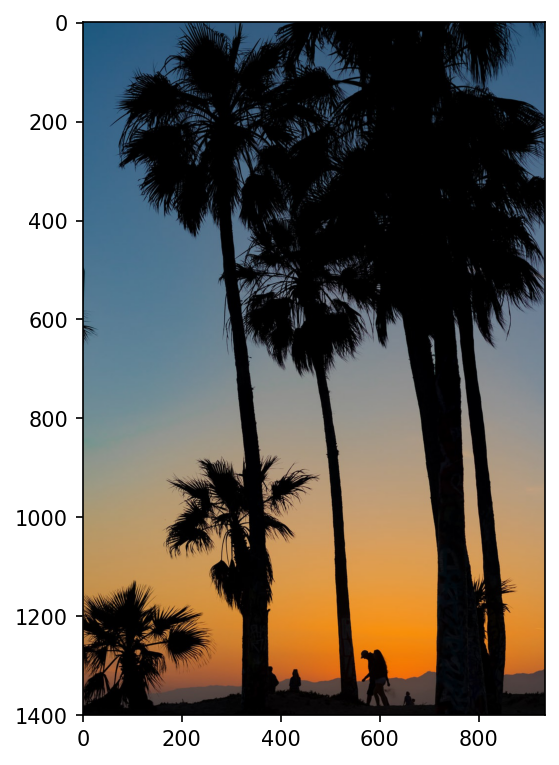

In [6]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(image_as_array);

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [7]:
image_as_array.shape
#(h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d
Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [23]:
(h,w,c) = image_as_array.shape

In [24]:
image_as_array2D = image_as_array.reshape(h*w, c)

In [25]:
from sklearn.cluster import KMeans

In [26]:
model = KMeans(n_clusters= 6)

In [27]:
labels = model.fit_predict(image_as_array2D)

In [28]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [29]:
# these are teh 6 RBG color code
model.cluster_centers_

array([[  2.73792458,   2.55581967,   3.67853432],
       [191.89965599, 154.53426769, 109.14688794],
       [ 71.18120072, 109.29111948, 137.67770466],
       [219.05993148, 135.22929485,  46.66463666],
       [ 66.98620608,  61.32071838,  61.82070528],
       [137.07690492, 143.84665154, 143.86123316]])

In [30]:
rgb_code = model.cluster_centers_.round(0).astype(int)

In [31]:
rgb_code

array([[  3,   3,   4],
       [192, 155, 109],
       [ 71, 109, 138],
       [219, 135,  47],
       [ 67,  61,  62],
       [137, 144, 144]])

In [32]:
quantized_image = np.reshape(rgb_code[labels],(h,w,c))

In [33]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  61,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  61,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

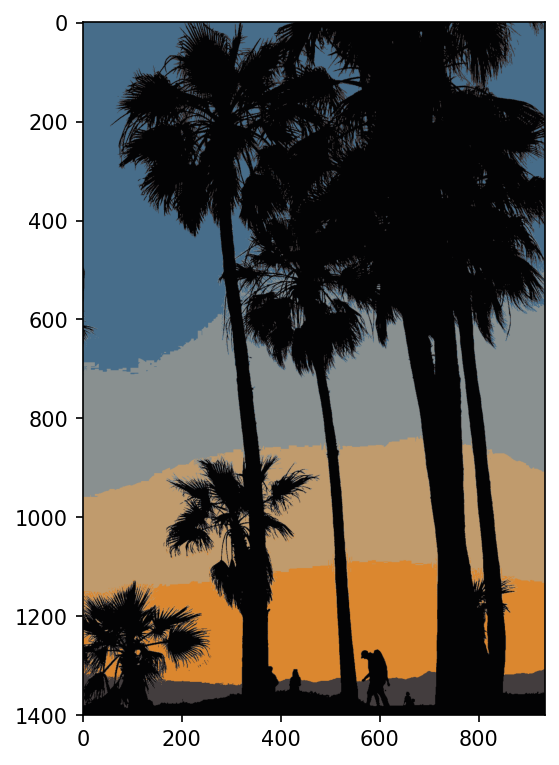

In [34]:
plt.figure(figsize=(6,6), dpi=150)
plt.imshow(quantized_image);